<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/ComputerVision_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow import keras
from sklearn.datasets import load_sample_image

np.random.seed(42)
tf.random.set_seed(42)

# Convolution_Tensorflow

In [7]:
#픽셀값을 0~1 로
china_image = load_sample_image("china.jpg") / 255.
flower_image = load_sample_image("flower.jpg") / 255.
images = np.array([china_image, flower_image])
batch_size, height, width, channels = images.shape
print(images.shape)

(2, 427, 640, 3)


(2, 427, 640, 2)


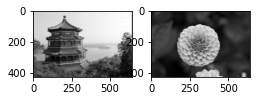

In [15]:
#2개의 수직, 수평 필터
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
filters[:, 3, : ,0] = 1
filters[3, :, :, 1] = 1

#저수준 컨볼루션 뉴런 계산
outputs = tf.nn.conv2d(images, filters, strides=1, padding='SAME')
print(outputs.shape)
plt.subplot(1,3,1)
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.subplot(1,3,2)
plt.imshow(outputs[1, :, :, 1], cmap="gray")
plt.show()

In [ ]:
#고수준 케라스 컨볼루션 레이어
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
